## Loading dataset

In [6]:
import pandas as pd
import glob

#df = pd.concat(map(pd.read_csv, glob.glob("backblaze2019/2019-01*.csv")))
df = pd.concat(map(pd.read_csv, glob.glob('./backblaze_ST4000DM000/model_2018_ST4000DM000.csv')))
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2018-01-01,Z3016TK2,ST4000DM000,4000787030016,0,115.0,87117728.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,W300GLSS,ST4000DM000,4000787030016,1,111.0,40108520.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,Z302SXQ0,ST4000DM000,4000787030016,0,119.0,208926768.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,Z3025L3F,ST4000DM000,4000787030016,1,111.0,30947064.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,Z302SW9C,ST4000DM000,4000787030016,0,117.0,137764288.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(380078, 105)

In [8]:
## Isolation Forest

## Taking features

In [9]:
df = df.filter(['date','serial_number','smart_5_raw', 'smart_187_raw', 'smart_197_raw', 'failure'])
df.shape

(380078, 6)

## Creating features

In [10]:
def create_features(g):
    # 5
    smart_5_shifted = g['smart_5_raw'].shift(fill_value=0)
    g['5_diff'] = g['smart_5_raw'] - smart_5_shifted
    #g.at[1, '5_diff'] = 0
    #g.ix[1, '5_diff'] = 0
    # 187
    smart_187_shifted = g['smart_187_raw'].shift(fill_value=0)
    g['187_diff'] = g['smart_187_raw'] - smart_187_shifted
    #g.at[1, '187_diff'] = 0
    #g.ix[1, '187_diff'] = 0
    # 197
    smart_197_shifted = g['smart_197_raw'].shift(fill_value=0)
    g['197_diff'] = g['smart_197_raw'] - smart_197_shifted
    #g.at[1, '197_diff'] = 0
    #g.ix[1, '197_diff'] = 0
    return g


#df = df.groupby(['serial_number'], group_keys=True).filter(lambda g: len(g['failure'].value_counts()) == 1
#                                                           # disk failed => check variance > 0
#                                                           or len(g['failure'].value_counts()) == 2
#                                                          and len(g['5_diff'].value_counts()) > 0
#                                                          and len(g['187_diff'].value_counts()) > 0
#                                                          and len(g['197_diff'].value_counts()) > 0)

#df1 = df1.reset_index()
df1 = df
df1 = df1.groupby(['serial_number'], group_keys=True, as_index=False).apply(lambda x: create_features(x))
df1.reset_index(drop=True, inplace=True)
df1.head(35)

,date,serial_number,smart_5_raw,smart_187_raw,smart_197_raw,failure,5_diff,187_diff,197_diff
0,2018-10-01,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2018-10-02,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
2,2018-10-03,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
3,2018-10-04,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
4,2018-10-05,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
5,2018-10-06,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
6,2018-10-07,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
7,2018-10-08,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
8,2018-10-01,S3001HBH,0.0,0.0,0.0,0,0.0,0.0,0.0
9,2018-10-02,S3001HBH,0.0,0.0,0.0,0,0.0,0.0,0.0


In [11]:
df1['5_diff'].value_counts()

0.0       379775
8.0           87
16.0          26
24.0          13
32.0          12
           ...  
544.0          1
368.0          1
168.0          1
232.0          1
2000.0         1
Name: 5_diff, Length: 77, dtype: int64

In [12]:
df1['187_diff'].value_counts()

0.0     379623
1.0        133
2.0         71
6.0         48
3.0         34
18.0        21
7.0         14
5.0         13
12.0        12
4.0         11
8.0         10
9.0          9
10.0         6
13.0         5
11.0         4
20.0         3
16.0         3
27.0         3
21.0         3
22.0         3
30.0         2
15.0         2
29.0         1
53.0         1
38.0         1
65.0         1
63.0         1
23.0         1
48.0         1
36.0         1
78.0         1
17.0         1
52.0         1
54.0         1
19.0         1
Name: 187_diff, dtype: int64

In [13]:
df1['197_diff'].value_counts()

 0.0       379635
 8.0          194
 16.0          62
-8.0           40
 32.0          17
 24.0          16
 40.0          14
 48.0           7
 72.0           5
 56.0           5
 88.0           4
 64.0           4
-16.0           4
 80.0           3
 104.0          3
 192.0          3
 128.0          2
 160.0          2
 136.0          2
 176.0          1
-24.0           1
 920.0          1
 504.0          1
 112.0          1
 3312.0         1
 9192.0         1
-40.0           1
 712.0          1
 400.0          1
 120.0          1
 1760.0         1
 184.0          1
 944.0          1
 376.0          1
 1560.0         1
 304.0          1
 992.0          1
 6.0            1
 256.0          1
 96.0           1
 168.0          1
-32.0           1
 216.0          1
Name: 197_diff, dtype: int64

## Dataset preprocessing

1. Removing duplicates

In [14]:
df1.shape

(380078, 9)

In [15]:
df1.drop_duplicates()

,date,serial_number,smart_5_raw,smart_187_raw,smart_197_raw,failure,5_diff,187_diff,197_diff
0,2018-10-01,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2018-10-02,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
2,2018-10-03,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
3,2018-10-04,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
4,2018-10-05,S3000A9T,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
380073,2018-03-27,Z307Y2X9,0.0,0.0,0.0,0,0.0,0.0,0.0
380074,2018-03-28,Z307Y2X9,0.0,0.0,0.0,0,0.0,0.0,0.0
380075,2018-03-29,Z307Y2X9,0.0,0.0,0.0,0,0.0,0.0,0.0
380076,2018-03-30,Z307Y2X9,0.0,0.0,0.0,0,0.0,0.0,0.0


In [16]:
df1.shape

(380078, 9)

2. Removing empty rows -- did it in previous section

In [17]:
df1 = df1.dropna()
df1.shape

(380046, 9)

3. Check for each disk whether the values are complete. This means that for a working disk, the last sample must match the last day of the dataset, and for a failed disk, the last sample in the failure feature must contain a value of 1. If these conditions are not met, all samples from that disk will be removed from the dataset.

In [18]:
df1['serial_number'].value_counts()

Z3010KGF    91
Z304HKCN    91
Z301D4BX    91
W3014QX7    91
Z305D4H6    91
            ..
Z305GWGH     1
Z3014Z5G     1
Z3014NYW     1
Z305GXAP     1
Z3029BDC     1
Name: serial_number, Length: 7894, dtype: int64

4.  For each failed hard disk, check if it has a variance greater than 0 in its features. If not, the hard disk will be removed from the dataset.

In [19]:
df1.shape

(380046, 9)

In [20]:
import numpy as np

numeric_data = df1.select_dtypes([np.number])
numeric_mean = numeric_data.mean()
numeric_features = numeric_data.columns

df1 = df1.fillna(numeric_mean)

In [21]:
df_train = df1[(df1['date'] >= "2018-01-01") & (df1['date'] <= "2018-02-28")]
df_test = df1[(df1['date'] >= "2018-03-01") & (df1['date'] <= "2018-03-31")]
print("train shape:", df_train.shape, " test shape:", df_test.shape)

train shape: (111331, 9)  test shape: (126960, 9)


In [22]:
string_columns = ['serial_number', 'date']
df_train = df_train.drop(string_columns, axis=1)
df_test = df_test.drop(string_columns, axis=1)

In [23]:
X_train = df_train.drop('failure', axis=1)
y_train = df_train['failure']

X_test = df_test.drop('failure', axis=1)
y_test = df_test['failure']

## Creating model

In [24]:
from sklearn.ensemble import IsolationForest

IF_FDR = IsolationForest(contamination=0.01)

IF_FAR = IsolationForest(contamination=0.0002)

In [25]:
IF_FDR.fit(X_train.values)
IF_FAR.fit(X_train.values)

IsolationForest(contamination=0.0002)

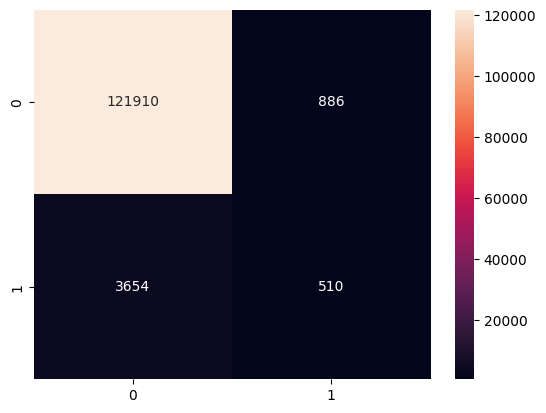

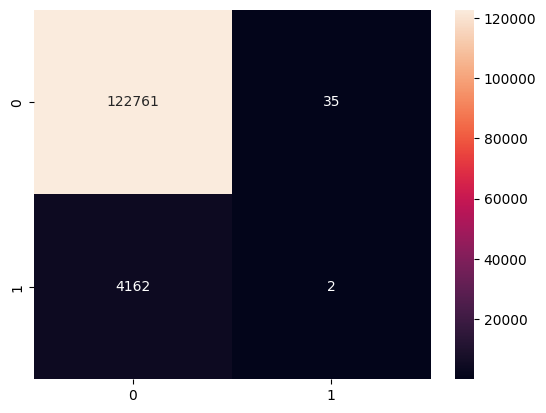

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def map_function(elem):
    if elem == -1:
        return 1
    else:
        return 0

y_pred_test = IF_FDR.predict(X_test.values)
y_pred_test = [map_function(a) for a in y_pred_test]
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')
plt.show()

y_pred_test_far = IF_FAR.predict(X_test.values)
y_pred_test_far = [map_function(a) for a in y_pred_test_far]
sns.heatmap(confusion_matrix(y_test, y_pred_test_far), annot=True, fmt='.0f')
plt.show()


In [27]:
pd.DataFrame(y_pred_test).value_counts()

0    125564
1      1396
dtype: int64

## Mahalanobis distance

### Defining estimators

In [28]:
def median_estimator(t_m, values):
    return np.median(values) > t_m

In [29]:
from scipy import stats

def MAD(values):
    return stats.median_abs_deviation(values, scale=1/1.4826)

# median absolute deviation estimator
def MAD_estimator(t_MAD, values):
    return MAD(values) > t_MAD

In [30]:
def logistic_f(x):
    return (np.exp(x) - 1) / (np.exp(x) + 1)

def logistic_f_derivative(x):
    return (2 * np.exp(x) / (np.exp(x) + 1)**2)

def calculate_arg_for_log_f(value_i, Ln, Sn):
    return (value_i - Ln) / Sn

# location M-estimator
def location_M(values):
    #print("values shape", values.shape, len(values))
    S_0 = MAD(values)
    Ln_0 = np.median(values)
    sum_log_f = np.zeros(values.shape[1])
    sum_der_log_f = np.zeros(values.shape[1])
    for value in values:
        arg = calculate_arg_for_log_f(value, Ln_0, S_0)
        sum_log_f = sum_log_f + logistic_f(arg)
        sum_der_log_f = sum_der_log_f + logistic_f_derivative(arg)
    return Ln_0 + S_0*(sum_log_f / sum_der_log_f)
    

def location_M_estimator(t_locM, values):
    return location_M(values) > t_locM

In [31]:
def ro_f(x):
    return (logistic_f(x / 0.3739))**2

def calculate_arg_for_ro(value_i, Ln, Sn):
    return (value_i - Ln) / Sn

# scale M-estimator
def scale_M(values):
    Sn_0 = MAD(values)
    # location M estimator defined above used here
    Ln_0 = np.median(values)
    sum_ro = 0
    for value in values:
        sum_ro = sum_ro + ro_f(calculate_arg_for_ro(value, Ln_0, Sn_0))    
    return Sn_0 * np.square(2 * sum_ro)

def scale_M_estimator(t_scM, values):
    return scale_M(values) > t_scM

### Combining estimators

In [32]:
def take_decision(values):
    m_est_res = median_estimator(np.repeat(0.1, values.shape[1]), values)
    MAD_est_res = MAD_estimator(3, values)
    locm_est_res = location_M_estimator(np.repeat(0.5, values.shape[1]), values)
    scalem_est_res = scale_M_estimator(np.repeat(0.5, values.shape[1]), values)
    if (m_est_res or MAD_est_res or locm_est_res or scalem_est_res):
        return 1
    else:
        return 0



### Calculate mahalanobis distance

In [33]:
# suppose we have X -- dataset
# X_j -- attributes
# X has n attributes and m observations
# Mahalanobis space is supposed to be built using healthy drives data


In [34]:
# normalize values

from sklearn.preprocessing import StandardScaler

# z_i in paper
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    #x_minus_mu = x - np.mean(data)
    #if not cov:
    #    cov = np.cov(data.values.T)
    #inv_covmat = np.linalg.pinv(cov)
    left_term = np.dot(x, cov)
    mahal = np.dot(left_term, x.T)
    return mahal.diagonal()

In [36]:
def calculate_cov_matrix(X):
    return np.cov(X.T)

def calculate_pseudoinv_matrix(X):
    return np.linalg.pinv(calculate_cov_matrix(X))

### Anomaly detection algorithm

In [37]:
from numpy.lib.stride_tricks import sliding_window_view 
import numpy as np

window_size = 6

def predict(test_values, train_values):
    number_of_features = test_values.shape[1]
    shape = (number_of_features, window_size)
    #print("len of test_values = ", len(test_values), "number of features = ", number_of_features)
    sliding_windows = sliding_window_view(test_values, shape)
    print("sliding windows = ", sliding_windows, " test_values", test_values, "len sliding windows", len(sliding_windows))
    result = np.full(len(test_values), 0)
    print("result = ", result)
    i = 0
    C = calculate_pseudoinv_matrix(train_values)
    for window in sliding_windows:
        # no need to recalculate values inside a sliding window, need to replace this method later
        md_values = mahalanobis(window, train_values, C)
        decision = take_decision(md_values)
        result[i + 5] = decision
        i = i + 1
    return result

sliding windows =  [[[[-0.020541   -0.0865884  -0.0743925  -0.0071496  -0.01652611
    -0.01130554]
   [-0.020541   -0.0865884  -0.0743925  -0.0071496  -0.01652611
    -0.01130554]
   [-0.020541   -0.0865884  -0.0743925  -0.0071496  -0.01652611
    -0.01130554]
   [-0.020541   -0.0865884  -0.0743925  -0.0071496  -0.01652611
    -0.01130554]
   [-0.020541   -0.0865884  -0.0743925  -0.0071496  -0.01652611
    -0.01130554]
   [-0.020541   -0.0865884  -0.0743925  -0.0071496  -0.01652611
    -0.01130554]]]


 [[[-0.020541   -0.0865884  -0.0743925  -0.0071496  -0.01652611
    -0.01130554]
   [-0.020541   -0.0865884  -0.0743925  -0.0071496  -0.01652611
    -0.01130554]
   [-0.020541   -0.0865884  -0.0743925  -0.0071496  -0.01652611
    -0.01130554]
   [-0.020541   -0.0865884  -0.0743925  -0.0071496  -0.01652611
    -0.01130554]
   [-0.020541   -0.0865884  -0.0743925  -0.0071496  -0.01652611
    -0.01130554]
   [-0.020541   -0.0865884  -0.0743925  -0.0071496  -0.01652611
    -0.01130554]]]


 

C:\Users\katevi\AppData\Local\Temp\ipykernel_11268\2154559578.py:2: RuntimeWarning: overflow encountered in exp
  return (np.exp(x) - 1) / (np.exp(x) + 1)
C:\Users\katevi\AppData\Local\Temp\ipykernel_11268\2154559578.py:2: RuntimeWarning: invalid value encountered in divide
  return (np.exp(x) - 1) / (np.exp(x) + 1)
C:\Users\katevi\AppData\Local\Temp\ipykernel_11268\2154559578.py:5: RuntimeWarning: overflow encountered in square
  return (2 * np.exp(x) / (np.exp(x) + 1)**2)
C:\Users\katevi\AppData\Local\Temp\ipykernel_11268\2154559578.py:5: RuntimeWarning: overflow encountered in exp
  return (2 * np.exp(x) / (np.exp(x) + 1)**2)
C:\Users\katevi\AppData\Local\Temp\ipykernel_11268\2154559578.py:5: RuntimeWarning: invalid value encountered in divide
  return (2 * np.exp(x) / (np.exp(x) + 1)**2)


y_pred_test  =  <class 'numpy.ndarray'>


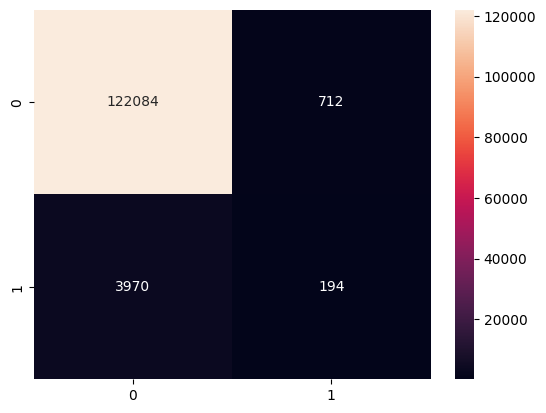

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_test = predict(X_test_scaled, X_train_scaled)
print("y_pred_test  = ", type(y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')
plt.show()